# Data Loading

In [ ]:
train_path = '/content/drive/MyDrive/AI Dataset/train/'

In [ ]:
test_path = '/content/drive/MyDrive/AI Dataset/test/'

In [ ]:
val_path = '/content/drive/MyDrive/AI Dataset/val/'

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

In [ ]:
# Load data train
train_data = pd.read_csv(train_path + "_classes.csv")
train_data.columns = ['filename', 'Brazil', 'Canada', 'Finland', 'Japan', 'United_Kingdom', 'United_States', 'Unlabeled']
train_data = train_data.loc[train_data['Unlabeled'] != 1]
filenames_train = train_data['filename'].to_list()
train_data = train_data.drop('Unlabeled', axis=1)
train_data = train_data.reset_index(drop=True)

In [ ]:
print(train_data.shape)
print(len(filenames_train))
print(train_data.columns)

(6231, 7)
6231
Index(['filename', 'Brazil', 'Canada', 'Finland', 'Japan', 'United_Kingdom',
       'United_States'],
      dtype='object')


In [ ]:
# Load data test
test_data = pd.read_csv(test_path + '_classes.csv')
test_data.columns = ['filename', 'Brazil', 'Canada', 'Finland', 'Japan', 'United_Kingdom', 'United_States', 'Unlabeled']
test_data = test_data[test_data['Unlabeled'] != 1]
filenames_test = test_data['filename'].to_list()
test_data = test_data.drop('Unlabeled', axis=1)
test_data = test_data.reset_index(drop=True)

In [ ]:
print(test_data.shape)
print(len(filenames_test))

(894, 7)
894


In [ ]:
def load_images_and_labels(data_path, filenames, df):
  X = []
  y = []
  for i, filename in enumerate(filenames):
    if os.path.exists(os.path.join(data_path, filename)):
      image = Image.open(os.path.join(data_path, filename))
      img_rs = image.resize((227, 227))
      img_rs = np.array(img_rs)
      X.append(img_rs)
      y.append([df['Brazil'][i], df['Canada'][i], df['Finland'][i], df['Japan'][i], df['United_Kingdom'][i], df['United_States'][i]])
  return X, y

In [ ]:
X_train, y_train = load_images_and_labels(train_path, filenames_train, train_data)

In [ ]:
X_test, y_test = load_images_and_labels(test_path, filenames_test, test_data)

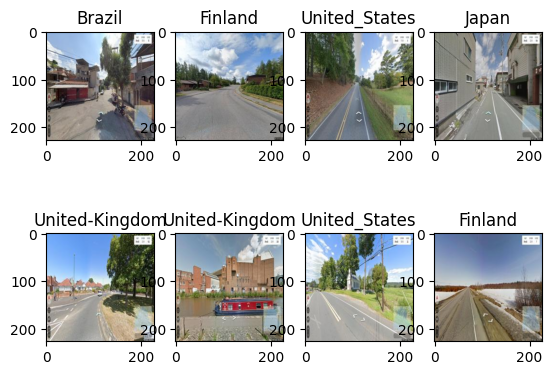

In [ ]:
import matplotlib.pyplot as plt
import random

cate = ['Brazil', 'Canada', 'Finland', 'Japan', 'United-Kingdom', 'United_States']
for i in range(8):
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[i])
  plt.title(cate[np.argmax(y_train[i])])

In [ ]:
data_dict = {
    'X_train': X_train,
    'y_train': y_train,
    'X_test': X_test,
    'y_test': y_test
}
np.save('/content/drive/MyDrive/AI Dataset/data_dict.npy', data_dict)

Load saved data dictionary

In [ ]:
data_dict_ = np.load('/content/drive/MyDrive/AI Dataset/data_dict.npy', allow_pickle = True).item()
X_train = data_dict_['X_train']
y_train = data_dict_['y_train']
X_test = data_dict_['X_test']
y_test = data_dict_['y_test']

# Data Preprocessing

In [ ]:
def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)

  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization
  X = X/255.0

  # one-hot encoding the labels
  y = np.array(y)

  return X, y

In [ ]:
(X_train, y_train) = preprocess_data(X_train, y_train)
(X_test, y_test) = preprocess_data(X_test, y_test)

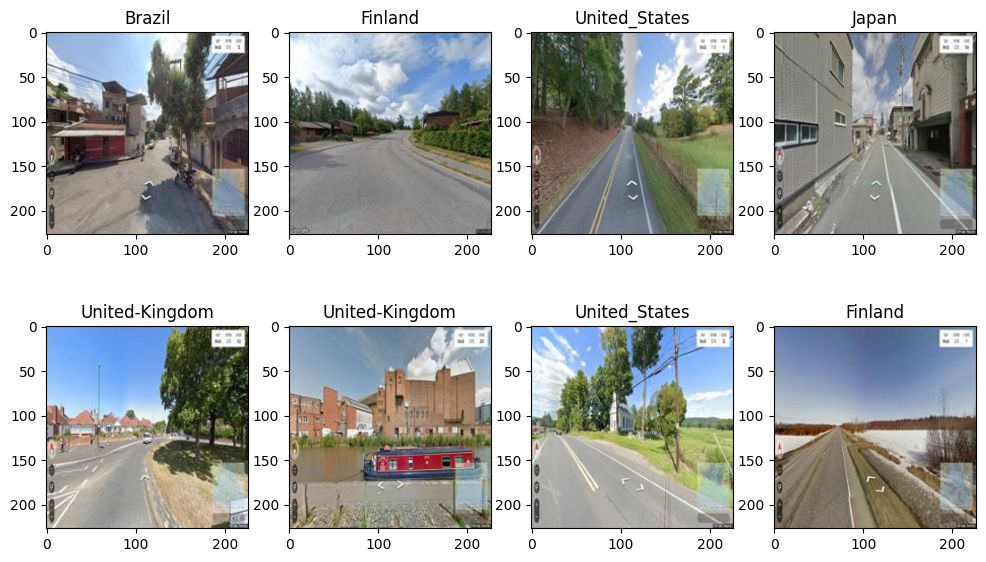

In [ ]:
import matplotlib.pyplot as plt

cate = ['Brazil', 'Canada', 'Finland', 'Japan', 'United-Kingdom', 'United_States']
plt.figure(figsize = (12,7))
for i in range(8):
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[i])
  plt.title(cate[np.argmax(y_train[i])])

# Alexnet Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.metrics import binary_crossentropy
from keras.optimizers import Adam

In [ ]:
def Alexnet():
  # Initialize the model
  model = Sequential()

  # layer 1: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (227,227,3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layer 2: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 3-5: three convolutional layers + 1 max-pooling layer
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 6 - 8: two fully connected hidden layers and one fully connected output layer
  model.add(Flatten())
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.2))

  # there are 6 classes so neuron number in output layer must be 7
  model.add(Dense(6, activation = 'softmax'))

  # compile the model with a loss funciton, a metric and and optimization method
  opt = Adam(learning_rate = 0.001)
  model.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])

  return model

In [ ]:
Alexnet_model = Alexnet()
Alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

# Training Model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  datagen = ImageDataGenerator(rotation_range = 5, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
  # iteration on the training set
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)

  # path to save the checkpoint
  path_cp = os.getcwd() + '/' + 'weights_.hdf5'
  checkpoint_ = ModelCheckpoint(path_cp, monitor = 'loss', save_best_only = True, mode = 'auto')
  steps = X_train.shape[0]//batch_size

  # Fitting the model
  history = model.fit(it_train, epochs = epochs, steps_per_epoch = steps, validation_data = (X_test, y_test), verbose = 1, callbacks = checkpoint_)

  # Evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))

  return history, acc

In [ ]:
import pickle

file = open("/content/drive/MyDrive/AI Model/alexnet_travelohi_v5.pickle", "rb")
Alexnet_model = pickle.load(file)
file.close()

In [ ]:
from keras.models import save_model

# Simpan model
model = Alexnet_model
model.save('/content/drive/MyDrive/AI Model/alexnet_travelohi_v6.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
train_history, acc = train_model(Alexnet_model, X_train, y_train, X_test, y_test, epochs = 30, batch_size = 128)

Epoch 1/30
47/47 [==============================] - ETA: 0s - loss: 0.1899 - accuracy: 0.7567

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 98s 2s/step - loss: 0.1899 - accuracy: 0.7567 - val_loss: 0.4811 - val_accuracy: 0.4454
Epoch 2/30
47/47 [==============================] - 92s 2s/step - loss: 0.1884 - accuracy: 0.7616 - val_loss: 0.5203 - val_accuracy: 0.4221
Epoch 3/30
47/47 [==============================] - 90s 2s/step - loss: 0.1835 - accuracy: 0.7713 - val_loss: 0.4794 - val_accuracy: 0.4540
Epoch 4/30
47/47 [==============================] - 91s 2s/step - loss: 0.1781 - accuracy: 0.7748 - val_loss: 0.4973 - val_accuracy: 0.4515
Epoch 5/30
47/47 [==============================] - 75s 2s/step - loss: 0.1796 - accuracy: 0.7700 - val_loss: 0.5299 - val_accuracy: 0.4331
Epoch 6/30
47/47 [==============================] - 87s 2s/step - loss: 0.1762 - accuracy: 0.7773 - val_loss: 0.5057 - val_accuracy: 0.4515
Epoch 7/30
47/47 [==============================] - 77s 2s/step - loss: 0.1764 - accuracy: 0.7816 - val_loss: 0.4791 - val_accuracy: 0.4491
Epoch 8/30
47/47 [=============

In [ ]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

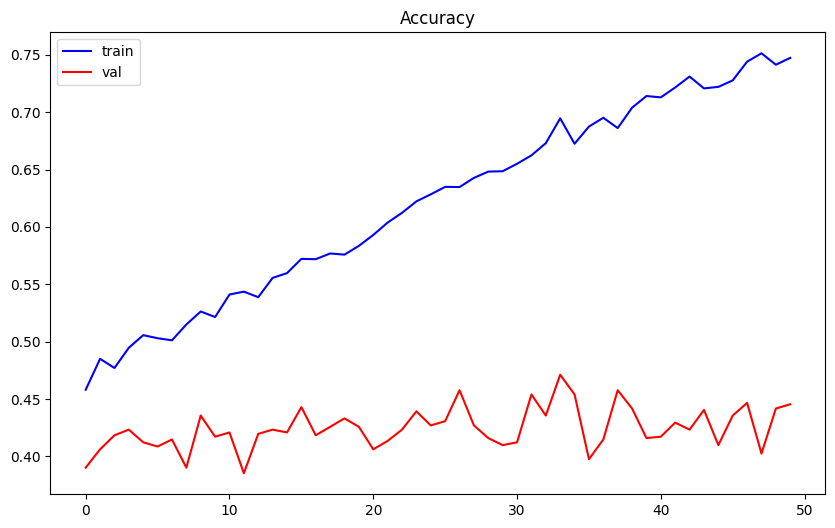

In [ ]:
plot_accuracy(train_history)

In [ ]:
import pickle

file = open("/content/drive/MyDrive/AI Model/alexnet_travelohi_v5.pickle", "wb")
pickle.dump(Alexnet_model, file)
file.close()

# Prediction

In [ ]:
y_test_pred = []
for i in np.arange(len(X_test)):
  img = X_test[i]
  img = img.reshape(1, 227, 227, 3)
  y_p = Alexnet_model.predict(img)
  y_test_pred.append(y_p)

y_test_pred = np.asarray(y_test_pred)

1/1 [==============================] - 0s 19ms/step


Text(95.72222222222221, 0.5, 'True classes')

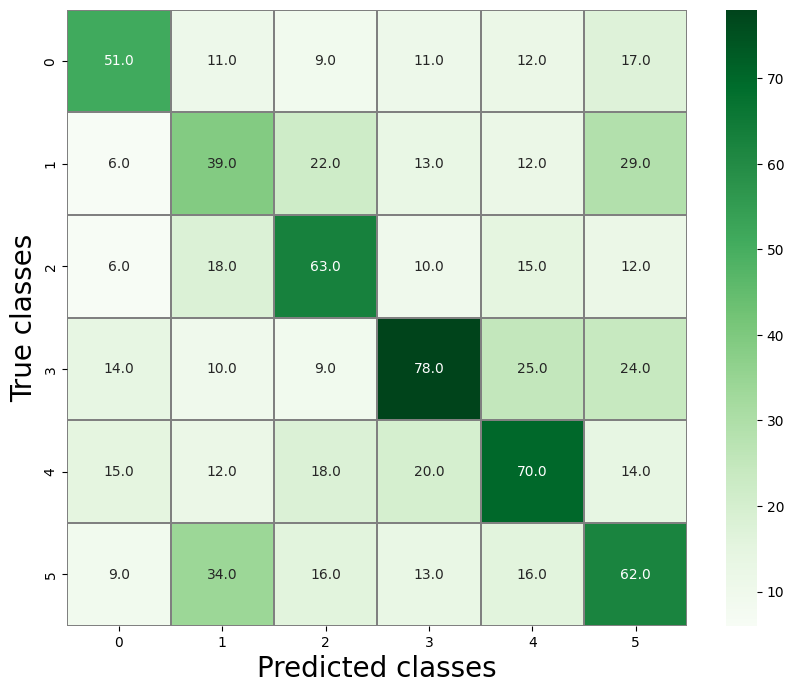

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Reverse the true and the predicted labels into the original binary
# labels (0 and 1) to compute the confusion matrix
y_test_labels = [np.argmax(vect) for vect in y_test]
y_test_pred_labels = [np.argmax(vect) for vect in y_test_pred]

conf_mat = confusion_matrix(y_test_labels, y_test_pred_labels)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray',
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)